In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv("./AirQualityUCI.csv",na_filter=True)

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
df.drop("Unnamed: 15",axis=1,inplace=True)
df.drop("Unnamed: 16",axis=1,inplace=True)

In [ ]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [ ]:
df.dropna(how='all',inplace=True)
#drop RH NAN rows
df.dropna(thresh=10,axis=0,inplace=True)

In [ ]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
df.shape

(9357, 15)

In [ ]:
df['Hour']=df['Time'].apply(lambda x: int(x.split(':')[0]))
df.Hour.head()

0    18
1    19
2    20
3    21
4    22
Name: Hour, dtype: int64

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22


In [ ]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Hour             0
dtype: int64

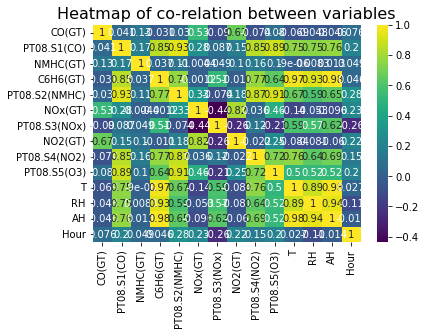

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
target=df.drop('RH',axis=1)
target=target.drop('Time',axis=1)
X=target.drop('Date',axis=1) #X-input features

y=df['RH']                    #y-input features

In [ ]:
features=X.columns

In [ ]:
features=['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','AH','Hour']


In [ ]:
ss=StandardScaler()     #initiatilise

In [ ]:
X_std=ss.fit_transform(X)     #apply stardardisation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.3)
print("xtrain shape : ", X_train.shape)
print("xtest shape : ", X_test.shape)
print("ytrain shape : ", y_train.shape)
print("ytest shape : ", y_test.shape)

xtrain shape :  (6549, 13)
xtest shape :  (2808, 13)
ytrain shape :  (6549,)
ytest shape :  (2808,)


In [ ]:
from sklearn.linear_model import LinearRegression
Linear_Model = LinearRegression()
Linear_Model_Fit = Linear_Model.fit(X_train, y_train)
print("Actual values are : \n",y_test)
# # predicting the test set result
pred = Linear_Model.predict(X_test)
print("\nPredicted values are : \n",pred)

Actual values are : 
 5795    49.8
5169    66.9
1845    13.5
4741    61.6
4959    60.8
        ... 
4597    50.7
7121    48.6
1286    66.1
2037    25.0
3010    42.3
Name: RH, Length: 2808, dtype: float64

Predicted values are : 
 [44.30268202 61.56828369 -2.7143348  ... 78.42474039 30.12491837
 48.90142621]


In [ ]:
df[features]

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,Hour
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,0.7578,18
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,0.7255,19
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,0.7502,20
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,0.7867,21
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,0.7888,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,0.7568,10
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,0.7119,11
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,0.6406,12
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,0.5139,13


In [ ]:
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = features
lreg_coefficient['Coefficient Estimate'] = pd.Series(Linear_Model.coef_)
print("\n Coefficients Estimate by Linear Model \n")
print(lreg_coefficient)
print("\n")
print("Intercept:", Linear_Model.intercept_)



 Coefficients Estimate by Linear Model 

          Columns  Coefficient Estimate
0          CO(GT)              0.404101
1     PT08.S1(CO)              3.857000
2        NMHC(GT)             -2.235600
3        C6H6(GT)            -50.555732
4   PT08.S2(NMHC)            -14.657220
5         NOx(GT)              7.793925
6    PT08.S3(NOx)             -5.952667
7         NO2(GT)             -6.422443
8    PT08.S4(NO2)             26.501751
9     PT08.S5(O3)             -0.372004
10              T            -85.888545
11             AH            174.797086
12           Hour             -0.718554


Intercept: 39.43505698268478


In [ ]:
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, pred)
print("Mean Square Error : ", MSE)
R2 = r2_score(y_test, pred)
print("R2 Error: ",R2)
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Square Error :  61.651926791120545
R2 Error:  0.9771310915887209
RMSE: 7.85187409419691


Thank You! :)